In [16]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [17]:
from helpers import *

# 1 Least squares and linear basis functions models
## 1.1 Least squares

In [18]:
def least_squares(y, tx):
    """calculate the least squares solution.
        returns mse, and optimal weights"""
    w= np.linalg.solve(np.transpose(tx).dot(tx),np.transpose(tx).dot(y))
    #w = np.linalg.inv(np.transpose(tx).dot(tx)).dot(np.transpose(tx)).dot(y)
    mse = compute_loss(y, tx, w)
    return mse, w

### Load the data
Here we will reuse the dataset `height_weight_genders.csv` from previous exercise section to check the correctness of your implementation. Please compare it with your previous result.

In [19]:
def test_your_least_squares():
    height, weight, gender = load_data_from_ex02(sub_sample=False, add_outlier=False)
    x, mean_x, std_x = standardize(height)
    y, tx = build_model_data(x, weight)
    
    max_iters = 50
    gamma = 0.1
    w_initial = np.array([50,10])
    
    le_mse, le_w = least_squares(y, tx)
    gd_mse, gd_w = gradient_descent(y, tx, w_initial, max_iters, gamma)
    
    print("Gradient descent: {} \nERROR: {}\n".format(gd_w[-1], gd_mse[-1]))    
    print("Least squares: {} \nERROR: {}\n".format(le_w, le_mse))
    print("Diff: {}".format(np.abs(gd_w[-1] - le_w)))

Test it here

In [20]:
test_your_least_squares()

Gradient descent: [ 73.17387036  13.46177878] 
ERROR: 15.394982937791948

Least squares: [ 73.293922    13.47971243] 
ERROR: 15.385887868829403

Diff: [ 0.12005164  0.01793366]


## 1.2 Least squares with a linear basis function model
Start from this section, we will use the dataset `dataEx3.csv`.

### Implement polynomial basis functions

In [21]:
# load dataset
x, y = load_data()
print("shape of x {}".format(x.shape))
print("shape of y {}".format(y.shape))

shape of x (50,)
shape of y (50,)


In [22]:
def build_poly(x, degree):
    """polynomial basis functions for input data x, for j=0 up to j=degree."""
    tx = np.ones(x.shape)
    for i in range(1, degree + 1):
        tx = np.column_stack((tx, np.power(x, i)))
    return tx
    
# print(build_poly(x,2))
# print(build_poly(x,3))

Let us play with polynomial regression. Note that we will use your implemented function `compute_mse`. Please copy and paste your implementation from exercise02.

In [23]:
from plots import *

def polynomial_regression():
    """Constructing the polynomial basis function expansion of the data,
       and then running least squares regression."""
    # define parameters
    degrees = [1, 3, 7, 12]
    
    # define the structure of the figure
    num_row = 2
    num_col = 2
    f, axs = plt.subplots(num_row, num_col)

    for ind, degree in enumerate(degrees):
        tx = build_poly(x, degree)
        mse, w = least_squares(y, tx)
        rmse = np.sqrt(2 * mse)
        print("Processing {i}th experiment, degree={d}, rmse={loss}".format(
              i=ind + 1, d=degree, loss=rmse))
        # plot fit
        plot_fitted_curve(
            y, x, w, degree, axs[ind // num_col][ind % num_col])
    plt.tight_layout()
    # plt.savefig("visualize_polynomial_regression")
    plt.show()
    

Run polynomial regression

Processing 1th experiment, degree=1, rmse=0.47187607963421874
Processing 2th experiment, degree=3, rmse=0.25858277667737484
Processing 3th experiment, degree=7, rmse=0.24965870360907094
Processing 4th experiment, degree=12, rmse=0.24331606072039247


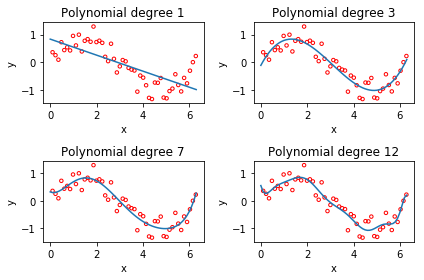

In [24]:
polynomial_regression()

# 2 Evaluating model predication performance


Let us show the train and test splits for various polynomial degrees. First of all, please fill in the function `split_data()`

In [25]:
def split_data(x, y, ratio, seed=1):
    """
    split the dataset based on the split ratio. If ratio is 0.8 
    you will have 80% of your data set dedicated to training 
    and the rest dedicated to testing
    """
    # set seed
    np.random.seed(seed)
    shuffle_indices = np.random.permutation(np.arange(x.shape[0]))
    shuffled_y = y[shuffle_indices]
    shuffled_x = x[shuffle_indices]
    
    n = np.floor(x.shape[0] * ratio).astype(int)
    train_x, test_x = shuffled_x[:n], shuffled_x[n:]
    train_y, test_y = shuffled_y[:n], shuffled_y[n:]
    
    return train_x, test_x, train_y, test_y

# split_data(x, y, 0.9)

Then, test your `split_data` function below.

In [26]:
def train_test_split_demo(x, y, degree, ratio, seed):
    """polynomial regression with different split ratios and different degrees."""
    train_x, test_x, train_y, test_y = split_data(x, y, ratio, seed)
    train_tx = build_poly(train_x, degree)
    test_tx = build_poly(test_x, degree)
    mse, w = least_squares(train_y, train_tx)
    rmse_tr = np.sqrt(2 * mse)
    rmse_te = np.sqrt(2 * compute_loss(test_y, test_tx, w))
    print("proportion={p}, degree={d}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
          p=ratio, d=degree, tr=rmse_tr, te=rmse_te))


In [27]:
seed = 6
degrees = [1, 3, 7, 12]
split_ratios = [0.9, 0.5, 0.1]

for split_ratio in split_ratios:
    for degree in degrees:
        train_test_split_demo(x, y, degree, split_ratio, seed)

proportion=0.9, degree=1, Training RMSE=0.494, Testing RMSE=0.181
proportion=0.9, degree=3, Training RMSE=0.264, Testing RMSE=0.206
proportion=0.9, degree=7, Training RMSE=0.254, Testing RMSE=0.220
proportion=0.9, degree=12, Training RMSE=0.242, Testing RMSE=0.248
proportion=0.5, degree=1, Training RMSE=0.455, Testing RMSE=0.531
proportion=0.5, degree=3, Training RMSE=0.239, Testing RMSE=0.296
proportion=0.5, degree=7, Training RMSE=0.232, Testing RMSE=0.284
proportion=0.5, degree=12, Training RMSE=0.205, Testing RMSE=1.575
proportion=0.1, degree=1, Training RMSE=0.428, Testing RMSE=0.534
proportion=0.1, degree=3, Training RMSE=0.085, Testing RMSE=0.460
proportion=0.1, degree=7, Training RMSE=0.000, Testing RMSE=2.068
proportion=0.1, degree=12, Training RMSE=0.000, Testing RMSE=4.461


# 3 Ridge Regression
Please fill in the function below.

In [28]:
def ridge_regression(y, tx, lambda_):
    """implement ridge regression."""
    lambda_ = lambda_* 2 * y.shape[0]
    #return np.linalg.inv(np.transpose(tx).dot(tx) + lambda_*2*n * np.identity(tx.shape[1])).dot(np.transpose(tx).dot(y))
    return np.linalg.solve(np.transpose(tx).dot(tx)+np.multiply(lambda_,np.identity(tx.shape[1])),np.transpose(tx).dot(y))
    

In [29]:
def ridge_regression_demo(x, y, degree, ratio, seed):
    """ridge regression demo."""
    # define parameter
    lambdas = np.logspace(-5, 0, 15)
    train_x, test_x, train_y, test_y = split_data(x, y, ratio, seed)
    train_tx = build_poly(train_x, degree)
    test_tx = build_poly(test_x, degree)

    rmse_tr = []
    rmse_te = []
    for ind, lambda_ in enumerate(lambdas):
        w = ridge_regression(train_y, train_tx, lambda_)
        rmse_tr.append(np.sqrt(2 * compute_loss(train_y, train_tx, w)))
        rmse_te.append(np.sqrt(2 * compute_loss(test_y, test_tx, w)))
        print("proportion={p}, degree={d}, lambda={l:.3f}, Training RMSE={tr:.3f}, Testing RMSE={te:.3f}".format(
               p=ratio, d=degree, l=lambda_, tr=rmse_tr[ind], te=rmse_te[ind]))
        
    # Plot the obtained results
    plot_train_test(rmse_tr, rmse_te, lambdas, degree)

proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.338
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.337
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.336
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.227, Testing RMSE=0.335
proportion=0.5, degree=7, lambda=0.000, Training RMSE=0.228, Testing RMSE=0.334
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.228, Testing RMSE=0.333
proportion=0.5, degree=7, lambda=0.001, Training RMSE=0.229, Testing RMSE=0.329
proportion=0.5, degree=7, lambda=0.003, Training RMSE=0.230, Testing RMSE=0.319
proportion=0.5, degree=7, lambda=0.007, Training RMSE=0.232, Testing RMSE=0.302
proportion=0.5, degree=7, lambda=0.016, Training RMSE=0.237, Testing RMSE=0.283
proportion=0.5, degree=7, lambda=0.037, Training RMSE=0.246, Testing RMSE=0.276
proportion=0.5, degree=7, lambda=0.085, Training RMSE=0.264, Testing RMSE=0.298
proportion=0.5, degree=7, lambda=0.193, 

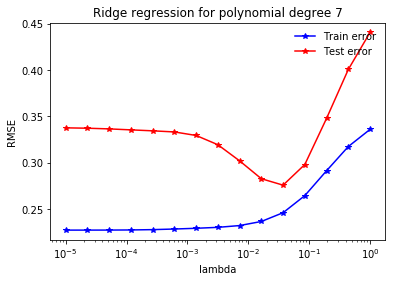

In [30]:
seed = 56
degree = 7
split_ratio = 0.5
ridge_regression_demo(x, y, degree, split_ratio, seed)
